In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn import linear_model

## Load dataset and visualize

Num Samples: 1797
Size: (8, 8)
Label Class: [0 1 2 3 4 5 6 7 8 9]


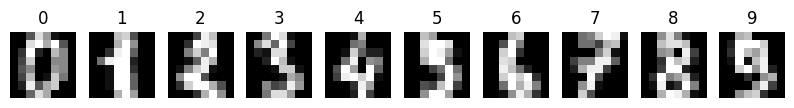

In [81]:
digits = load_digits()
X = digits.data
y = digits.target

print(f"Num Samples: {len(X)}")
print(f"Size: {digits.images[0].shape}")
print(f"Label Class: {digits.target[:10]}")

fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(digits.target[i])
    axes[i].axis('off')
plt.show()


## Pre-processing: scale data

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data in to 2 set: train and test with ratio 75 25

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

## Call model and fit

In [84]:
logreg = linear_model.LogisticRegression(C=1e6, solver = 'lbfgs', multi_class = 'multinomial')
logreg.fit(X_train, y_train)


LogisticRegression(C=1000000.0, multi_class='multinomial')

In [85]:
ovr = linear_model.LogisticRegression(C=1e6, multi_class = 'ovr')
ovr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000.0, multi_class='ovr')

## Apply metrics and print the results

In [90]:
y_pred_softmax = logreg.predict(X_test)
y_pred_ovr = ovr.predict(X_test)

In [91]:
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
precision_softmax = precision_score(y_test, y_pred_softmax, average='macro')
recall_softmax = recall_score(y_test, y_pred_softmax, average='macro')
f1_softmax = f1_score(y_test, y_pred_softmax, average='macro')

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
precision_ovr = precision_score(y_test, y_pred_ovr, average='macro')
recall_ovr = recall_score(y_test, y_pred_ovr, average='macro')
f1_ovr = f1_score(y_test, y_pred_ovr, average='macro')

print(f'Accuracy Softmax: {accuracy_softmax:.4f}')
print(f'Precision Softmax: {precision_softmax:.4f}')
print(f'Recall Softmax: {recall_softmax:.4f}')
print(f'F1 Score Softmax: {f1_softmax:.4f}')

print("-------------------------------------")
print(f'Accuracy OvR: {accuracy_ovr:.4f}')
print(f'Precision OvR: {precision_ovr:.4f}')
print(f'Recall OvR: {recall_ovr:.4f}')
print(f'F1 Score OvR: {f1_ovr:.4f}')

Accuracy Softmax: 0.9533
Precision Softmax: 0.9533
Recall Softmax: 0.9522
F1 Score Softmax: 0.9524
-------------------------------------
Accuracy OvR: 0.9511
Precision OvR: 0.9509
Recall OvR: 0.9522
F1 Score OvR: 0.9510


## Conclusion
Mặc dù kết quả từ Softmax Regression tốt hơn một chút so với OvR khi hoạt động với đa nhãn, nhưng thực chất nó vẫn chỉ tốt với dữ liệu linear separable, nó không có khả năng hoạt động quá tốt khi dữ liệu phi tuyến. 